<a href="https://colab.research.google.com/github/ArowoloDeborah/weather-predictions/blob/main/My_Weather_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('/content/3426137.csv')
data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,NIM00065046,"MALLAM AMINU INTERNATIONAL, NI",12.048,8.525,476.1,1973-02-06,NaN,NaN,82,"H,,S",NaN,NaN,NaN,NaN
1,NIM00065046,"MALLAM AMINU INTERNATIONAL, NI",12.048,8.525,476.1,1973-03-06,NaN,NaN,72,"H,,S",NaN,NaN,NaN,NaN
2,NIM00065046,"MALLAM AMINU INTERNATIONAL, NI",12.048,8.525,476.1,1973-03-27,NaN,NaN,92,"H,,S",NaN,NaN,NaN,NaN
3,NIM00065046,"MALLAM AMINU INTERNATIONAL, NI",12.048,8.525,476.1,1973-04-12,NaN,NaN,95,"H,,S",NaN,NaN,NaN,NaN
4,NIM00065046,"MALLAM AMINU INTERNATIONAL, NI",12.048,8.525,476.1,1973-05-18,NaN,NaN,89,"H,,S",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26797,NIM00065271,"MAKURDI, NI",7.704,8.614,113.1,2023-07-28,NaN,NaN,82,"H,,S",92.0,",,S",76.0,",,S"
26798,NIM00065271,"MAKURDI, NI",7.704,8.614,113.1,2023-07-30,NaN,NaN,83,"H,,S",NaN,NaN,74.0,",,S"
26799,NIM00065271,"MAKURDI, NI",7.704,8.614,113.1,2023-07-31,NaN,NaN,85,"H,,S",NaN,NaN,76.0,",,S"
26800,NIM00065271,"MAKURDI, NI",7.704,8.614,113.1,2023-08-06,NaN,NaN,80,"H,,S",82.0,",,S",74.0,",,S"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26802 entries, 0 to 26801
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          26802 non-null  object 
 1   NAME             26802 non-null  object 
 2   LATITUDE         26802 non-null  float64
 3   LONGITUDE        26802 non-null  float64
 4   ELEVATION        26802 non-null  float64
 5   DATE             26802 non-null  object 
 6   PRCP             1793 non-null   float64
 7   PRCP_ATTRIBUTES  1793 non-null   object 
 8   TAVG             26802 non-null  int64  
 9   TAVG_ATTRIBUTES  26802 non-null  object 
 10  TMAX             11465 non-null  float64
 11  TMAX_ATTRIBUTES  11465 non-null  object 
 12  TMIN             11164 non-null  float64
 13  TMIN_ATTRIBUTES  11164 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 2.9+ MB


In [ ]:
data.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,26802.000000,26802.000000,26802.000000,1793.000000,26802.000000,11465.000000,11164.000000
mean,8.515707,6.466595,282.446108,0.516207,81.117976,90.669080,71.831960
std,2.412924,2.659326,311.550244,1.355371,5.765329,5.888891,5.962894
min,5.015000,3.321000,26.500000,0.000000,44.000000,68.000000,41.000000
25%,6.577000,3.321000,41.100000,0.000000,78.000000,87.000000,70.000000
50%,8.440000,6.533000,260.000000,0.000000,81.000000,90.000000,73.000000
75%,9.640000,8.525000,476.100000,0.430000,84.000000,94.000000,75.000000
max,12.048000,13.083000,1289.900000,17.960000,106.000000,114.000000,88.000000


In [ ]:
data.isnull().sum()

STATION                0
NAME                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
DATE                   0
PRCP               25009
PRCP_ATTRIBUTES    25009
TAVG                   0
TAVG_ATTRIBUTES        0
TMAX               15337
TMAX_ATTRIBUTES    15337
TMIN               15638
TMIN_ATTRIBUTES    15638
dtype: int64

In [ ]:
data =data.drop(['NAME', 'STATION', 'LATITUDE','LONGITUDE', 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES'], axis =1)

In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN
0,1973-02-06,NaN,82,NaN,NaN
1,1973-03-06,NaN,72,NaN,NaN
2,1973-03-27,NaN,92,NaN,NaN
3,1973-04-12,NaN,95,NaN,NaN
4,1973-05-18,NaN,89,NaN,NaN
...,...,...,...,...,...
26797,2023-07-28,NaN,82,92.0,76.0
26798,2023-07-30,NaN,83,NaN,74.0
26799,2023-07-31,NaN,85,NaN,76.0
26800,2023-08-06,NaN,80,82.0,74.0


In [ ]:
data.isnull().sum()

DATE        0
PRCP    25009
TAVG        0
TMAX    15337
TMIN    15638
dtype: int64

In [ ]:
data.value_counts()

DATE        PRCP  TAVG  TMAX   TMIN
1979-06-10  0.00  83    100.0  77.0    1
2019-07-14  0.00  79    87.0   73.0    1
2019-07-22  0.04  80    89.0   74.0    1
2019-08-02  0.43  79    86.0   74.0    1
2019-08-03  0.00  78    83.0   76.0    1
                                      ..
2012-05-27  0.00  83    91.0   73.0    1
2012-05-29  1.46  77    83.0   66.0    1
2012-05-30  1.65  78    85.0   66.0    1
2012-06-03  0.91  80    89.0   72.0    1
2023-08-11  0.00  76    81.0   70.0    1
Length: 656, dtype: int64

In [ ]:
data['PRCP'].value_counts()

0.00    934
0.04     48
0.08     47
0.12     46
0.20     43
       ... 
4.22      1
0.40      1
9.84      1
2.17      1
2.95      1
Name: PRCP, Length: 144, dtype: int64

In [ ]:
data['PRCP'] = data['PRCP'].fillna(0)

In [ ]:
data = data.fillna(method="ffill")

In [ ]:
data.apply(pd.isnull).sum()

DATE     0
PRCP     0
TAVG     0
TMAX    87
TMIN    86
dtype: int64

In [ ]:
data['TMAX'] = data['TMAX'].fillna(method="ffill")

In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN
0,1973-02-06,0.0,82,NaN,NaN
1,1973-03-06,0.0,72,NaN,NaN
2,1973-03-27,0.0,92,NaN,NaN
3,1973-04-12,0.0,95,NaN,NaN
4,1973-05-18,0.0,89,NaN,NaN
...,...,...,...,...,...
26797,2023-07-28,0.0,82,92.0,76.0
26798,2023-07-30,0.0,83,92.0,74.0
26799,2023-07-31,0.0,85,92.0,76.0
26800,2023-08-06,0.0,80,82.0,74.0


In [ ]:
data['TMAX'] = data['TMAX'].fillna(0)
data
data['TMIN'] = data['TMIN'].fillna(0)

In [ ]:
data.isnull().sum()

DATE    0
PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [ ]:
data.dtypes

DATE     object
PRCP    float64
TAVG      int64
TMAX    float64
TMIN    float64
dtype: object

In [ ]:
data.apply(lambda x: (x==9999).sum())

DATE    0
PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

<Axes: >

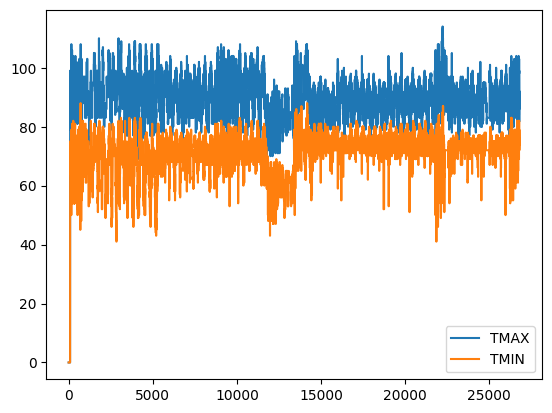

In [ ]:
data[['TMAX', 'TMIN']].plot()

<Axes: >

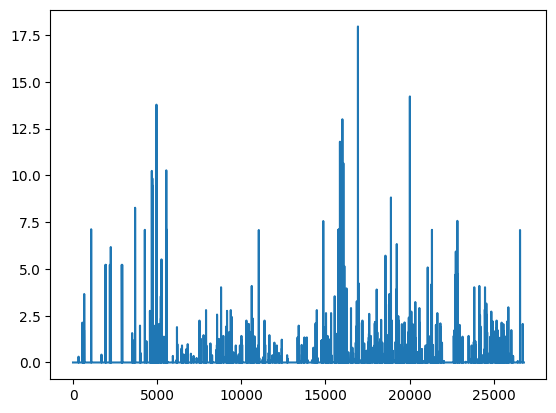

In [ ]:
data['PRCP'].plot()

In [ ]:
data['target'] = data.shift(-1)['TMAX']

In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN,target
0,1973-02-06,0.0,82,0.0,0.0,0.0
1,1973-03-06,0.0,72,0.0,0.0,0.0
2,1973-03-27,0.0,92,0.0,0.0,0.0
3,1973-04-12,0.0,95,0.0,0.0,0.0
4,1973-05-18,0.0,89,0.0,0.0,0.0
...,...,...,...,...,...,...
26797,2023-07-28,0.0,82,92.0,76.0,92.0
26798,2023-07-30,0.0,83,92.0,74.0,92.0
26799,2023-07-31,0.0,85,92.0,76.0,82.0
26800,2023-08-06,0.0,80,82.0,74.0,82.0


In [ ]:
data = data.iloc[:-1,:].copy()

In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN,target
0,1973-02-06,0.0,82,0.0,0.0,0.0
1,1973-03-06,0.0,72,0.0,0.0,0.0
2,1973-03-27,0.0,92,0.0,0.0,0.0
3,1973-04-12,0.0,95,0.0,0.0,0.0
4,1973-05-18,0.0,89,0.0,0.0,0.0
...,...,...,...,...,...,...
26796,2023-07-21,0.0,84,91.0,74.0,92.0
26797,2023-07-28,0.0,82,92.0,76.0,92.0
26798,2023-07-30,0.0,83,92.0,74.0,92.0
26799,2023-07-31,0.0,85,92.0,76.0,82.0


In [ ]:
 from sklearn.linear_model import Ridge
 reg = Ridge(alpha=.1)

In [ ]:
predictors = ['PRCP', 'TMAX', 'TMIN']
print('successful')

successful


In [ ]:
train = data.loc[:'2022-12-31']
print('successful')

successful


In [ ]:
test = data.loc[:'2022-01-01']
print('successful')

successful


In [ ]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [ ]:
 predictions = reg.predict(test[predictors])
 print('successful')

successful


In [ ]:
from sklearn.metrics import mean_absolute_error
print('successful')

successful


In [ ]:
mean_absolute_error(test['target'], predictions)

1.3575082708381436

In [ ]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual','predictions']
print('successful')

successful


In [ ]:
combined

,actual,predictions
0,0.0,3.535535
1,0.0,3.535535
2,0.0,3.535535
3,0.0,3.535535
4,0.0,3.535535
...,...,...
20215,88.0,88.289048
20216,89.0,88.235876
20217,89.0,89.202610
20218,83.0,89.202610


<Axes: >

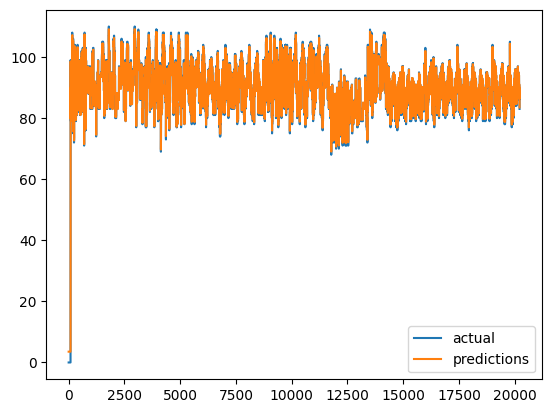

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([0.01833534, 0.94014751, 0.02658595])

In [ ]:
def create_predictions(predictors, data, reg):
 train = data.loc[:'2022-12-31']
 test = data.loc[:'2022-01-01']
 reg.fit(train[predictors], train['target'])
 predictions = reg.predict(test[predictors])
 error = mean_absolute_error(test['target'], predictions)
 combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
 combined.columns = ['actual','predictions']
 return error, combined

In [ ]:
data['month_max'] = data['TMAX'].rolling(30).mean()
print('successful')

successful


In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN,target,month_max
0,1973-02-06,0.0,82,0.0,0.0,0.0,NaN
1,1973-03-06,0.0,72,0.0,0.0,0.0,NaN
2,1973-03-27,0.0,92,0.0,0.0,0.0,NaN
3,1973-04-12,0.0,95,0.0,0.0,0.0,NaN
4,1973-05-18,0.0,89,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
26796,2023-07-21,0.0,84,91.0,74.0,92.0,94.933333
26797,2023-07-28,0.0,82,92.0,76.0,92.0,95.200000
26798,2023-07-30,0.0,83,92.0,74.0,92.0,95.466667
26799,2023-07-31,0.0,85,92.0,76.0,82.0,95.133333


In [ ]:
data['month_day_max'] = data['month_max'] / data['TMAX']
print('successful')

successful


In [ ]:
data['max_min'] = data['TMAX'] / data['TMIN']
print('successful')

successful


In [ ]:
predictors = ['PRCP', 'TMAX', 'TMIN']
print('successful')

successful


In [ ]:
 data = data.iloc[60:,:].copy()
print('successful')


successful


In [ ]:
data.isnull().sum()

DATE              0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
target            0
month_max         0
month_day_max    27
max_min          26
dtype: int64

In [ ]:
error, combined = create_predictions(predictors, data, reg)
print('successful')

successful


In [ ]:
error

1.3890320957569628

<Axes: >

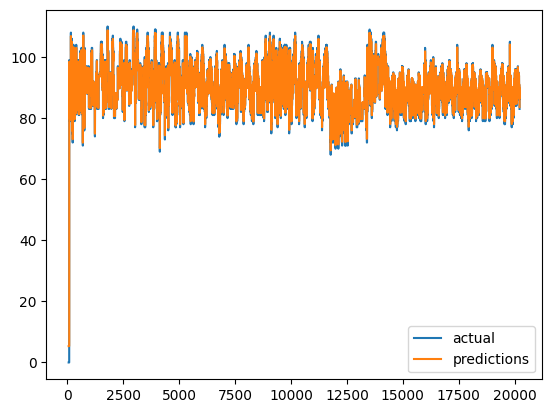

In [ ]:
combined.plot()

In [ ]:
data

,DATE,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,max_min
60,1974-04-01,0.0,83,0.0,0.0,0.0,0.000000,NaN,NaN
61,1974-04-03,0.0,89,0.0,0.0,0.0,0.000000,NaN,NaN
62,1974-04-07,0.0,88,0.0,0.0,0.0,0.000000,NaN,NaN
63,1974-04-08,0.0,85,0.0,0.0,0.0,0.000000,NaN,NaN
64,1974-04-13,0.0,90,0.0,0.0,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26796,2023-07-21,0.0,84,91.0,74.0,92.0,94.933333,1.043223,1.229730
26797,2023-07-28,0.0,82,92.0,76.0,92.0,95.200000,1.034783,1.210526
26798,2023-07-30,0.0,83,92.0,74.0,92.0,95.466667,1.037681,1.243243
26799,2023-07-31,0.0,85,92.0,76.0,82.0,95.133333,1.034058,1.210526


In [ ]:
reg.coef_

array([0.01063575, 0.92564517, 0.0195411 ])

In [ ]:
data.corr()['target']

<ipython-input-288-fbe4cdfb5637>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['target']


PRCP            -0.030317
TAVG             0.563094
TMAX             0.928971
TMIN             0.353292
target           1.000000
month_max        0.769228
month_day_max   -0.397335
max_min          0.332987
Name: target, dtype: float64

In [ ]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

In [ ]:
combined.sort_values('diff', ascending=False).head()

,actual,predictions,diff
86,93.0,6.820675,86.179325
247,104.0,74.080115,29.919885
3461,100.0,77.743613,22.256387
4512,76.0,97.143080,21.143080
13509,107.0,86.543406,20.456594


In [ ]:
predictors = ['PRCP', 'TMAX', 'TMIN']
print ('successful')

successful


In [ ]:
import joblib
joblib.dump(reg,'prediction1.joblib')

['prediction1.joblib']